In [1]:
import pandas as pd
import numpy as np

from bokeh.io import output_notebook, show
from bokeh.layouts import row, gridplot, widgetbox, column
from bokeh.charts import Histogram, BoxPlot, Scatter, Line, Bar, Donut

from scipy import stats
import matplotlib.pyplot as plt

import os

#### Data Acquisition

De XML bestanden zijn hier omgezet naar een CSV bestand via één van de volgende professionele tools:
- Excel
- Gnumeric
- LibreOffice

De laatste 2 zijn gratis te gebruiken.

De <b>hoofdDataSet</b> kan worden geassigned aan een andere dataset. De resulaten in deze notebook zullen daarop aanpassen.

In [2]:
df_FC_Utrecht_NEC = pd.read_csv('20160410_FC_Utrecht_NEC.csv', sep=';')
df_NEC_Cambuur = pd.read_csv('20160417_NEC_Cambuur.csv', sep=';')
df_PEC_NEC = pd.read_csv('20160420_PEC_NEC.csv', sep=';')
df_NEC_Roda_JC = pd.read_csv('20160501_NEC_Roda_JC.csv', sep=';')

hoofdDataSet = df_FC_Utrecht_NEC;

In [3]:
games = os.listdir("games")
matchIDs = []
for i in games:
    matchIDs.append(i.split("_")[0])
matchIDs

['20160410', '20160417', '20160420', '20160501']

In [4]:
playerDict = []
for id in matchIDs:
    for folder in os.listdir("gps"):
        if(folder.startswith(id)):
            files = os.listdir("gps/" + folder)
            match = folder[9:]
            players = []
            for i in files:
                players.append(i[:-4])
            playerDict.append({"ID":id,
                          "match":match,
                          "players":players
            })

# 1. Exploratie & Data wrangling

In [5]:
hoofdDataSet.head(10)

,start_time,ID,start,end,code,group,text,code2,R,G,B
0,2016-04-10 14:24:38.93 +0200,1.0,"4,311042897","40,97118767",TEG,Naar zone,M2 TEG,NaN,NaN,NaN,NaN
1,2016-04-10 14:24:38.93 +0200,1.0,"4,311042897","40,97118767",TEG,Naar zone,L2 TEG,NaN,NaN,NaN,NaN
2,2016-04-10 14:24:38.93 +0200,1.0,"4,311042897","40,97118767",TEG,Naar zone,M1 TEG,NaN,NaN,NaN,NaN
3,2016-04-10 14:24:38.93 +0200,1.0,"4,311042897","40,97118767",TEG,Storen NEC,Compact,NaN,NaN,NaN,NaN
4,2016-04-10 14:24:38.93 +0200,1.0,"4,311042897","40,97118767",TEG,Storen NEC,Druk,NaN,NaN,NaN,NaN
5,2016-04-10 14:24:38.93 +0200,1.0,"4,311042897","40,97118767",TEG,Naar zone,R1 TEG,NaN,NaN,NaN,NaN
6,2016-04-10 14:24:38.93 +0200,1.0,"4,311042897","40,97118767",TEG,Naar zone,R2 TEG,NaN,NaN,NaN,NaN
7,2016-04-10 14:24:38.93 +0200,1.0,"4,311042897","40,97118767",TEG,Naar zone,M1 TEG,NaN,NaN,NaN,NaN
8,2016-04-10 14:24:38.93 +0200,1.0,"4,311042897","40,97118767",TEG,Naar zone,R1 TEG,NaN,NaN,NaN,NaN
9,2016-04-10 14:24:38.93 +0200,1.0,"4,311042897","40,97118767",TEG,Aanvallen TEG,Lange pass,NaN,NaN,NaN,NaN


In [6]:
hoofdDataSet.code.unique()

array(['TEG', 'M2 TEG', 'Start Jaimy', 'Verdedigen', 'AFTRAP WB', 'L2 TEG',
       'M1 TEG', 'VERD. Compact NEC', 'VERD. Druk NEC', 'R1 TEG', 'R2 TEG',
       'OPB. Lange pass TEG', 'NEC', 'OMSCH aanvallen', 'Balwinst',
       'Start',
       'gAAAAABYrzOUx70t7JKQR_R_qB_fAsAQ_kssPG0dUdL65VwJwkYRyU-pgO2G2z352X3ke-Lnug_HD8rZu7oi0TLSthtXJAkAEQ==',
       'Inworp NEC', 'L3 NEC', 'Aanvallen',
       'b6a6aeaf67e640fe9eb72d888ba046f9',
       'feaf75270e9c46178b6b36507d9576da',
       'gAAAAABYrzOViQ5bQbZkXvcGYeCP26pkycVHvEX9hKy1nUCyuefXEY9HKEgCE7wXFXjf7_XrzdP3SyJaK61nxal6w4a9NkFz9w==',
       'R2 NEC', 'OPB. Lange pass NEC',
       'gAAAAABYrzOUOTRugGK4u8cjcl60I8vjDVJstq7eg1TC3R8eeT4TKcubEQWcFxEppjQ7AvbZhcdnr1yLTAHw184kNAHQ1Vr2rw==',
       'M3 NEC',
       'gAAAAABYrzOU_m3cv0-Mq0cAMfKcJ6PZ09fQgxq6iILsRdDLnA2dMrbRoZyMYM5lMtX3tZLG_Svn5vlJG4wwwhUHT-dJt4yblA==',
       'gAAAAABYrzOUCFm6Bomi2VGE_iRXHdIQjqXIfnAuYWfxtFhYV9CpD2JvtQcJqYfC2yxRxrBX_m13f_z9_L-YqSrSJRdSuUFYpQ==',
       'R4 NEC', 'OMSC

In [7]:
hoofdDataSet.group.unique()

array(['Naar zone', 'Storen NEC', 'Aanvallen TEG', 'Rendement', nan,
       'Startzone NEC', 'Naar speler', 'Start', 'Van speler',
       'Aanvallen NEC', 'Startzone TEG', 'Betrokken', 'Storen TEG'], dtype=object)

In [8]:
hoofdDataSet[hoofdDataSet['group'] == 'Naar zone'].text.unique()

array(['M2 TEG', 'L2 TEG', 'M1 TEG', 'R1 TEG', 'R2 TEG', 'L3 NEC',
       'R2 NEC', 'M3 NEC', 'R4 NEC', 'L1 TEG', 'R3 TEG', 'M3 TEG',
       'L3 TEG', 'M4 TEG', 'L1 NEC', 'L2 NEC', 'M1 NEC', 'R4 TEG',
       'M2 NEC', 'R1 NEC', 'R3 NEC', 'M4 NEC', 'L4 TEG', 'L4 NEC'], dtype=object)

## 1.1. Rendement groepen per dataset:

In [9]:
df_FC_Utrecht_NEC[df_FC_Utrecht_NEC['group'] == 'Rendement'].text.unique()

array(['Balwinst', 'BOP', 'Balverlies', 'Voorzet', 'Foul TEG', 'Corner',
       'Doelpoging', 'Foul NEC'], dtype=object)

In [10]:
df_NEC_Cambuur[df_NEC_Cambuur['group'] == 'Rendement'].text.unique()

array(['Balwinst', 'Balverlies', 'Corner', 'BOP', 'Foul NEC', 'Voorzet',
       'Doelpoging', 'Foul TEG'], dtype=object)

In [11]:
df_PEC_NEC[df_PEC_NEC['group'] == 'Rendement'].text.unique()

array(['Balwinst', 'Corner', 'Voorzet', 'Balverlies', 'BOP', 'Foul NEC',
       'Foul TEG', 'Doelpoging', 'Balbezit'], dtype=object)

In [12]:
df_NEC_Roda_JC[df_NEC_Roda_JC['group'] == 'Rendement'].text.unique()

array(['BOP', 'Balverlies', 'Balwinst', 'Voorzet', 'Corner', 'Balbezit',
       'Foul NEC', 'Doelpoging', 'Foul TEG'], dtype=object)

## 1.2. Goals per dataset:

Een functie om de eindstand te berekenen op basis van de codes: <i>Goal NEC</i> en <i>Goal TEG</i>.

In [13]:
def eindstand(df):
    nec = len(df[df['code'] == 'Goal NEC'].ID.unique())
    teg = len(df[df['code'] == 'Goal TEG'].ID.unique())
    return (str(nec) + ' - ' + str(teg))

#### Eindstand hoofdDataSet

Deze eindstand kan mogelijk hieronder nogmaals voorkomen als de hoofdDataSet niet afwijkt van de standaard meegeleverde datasets.

In [14]:
hoofdDataSet[hoofdDataSet['code'] == 'Goal NEC'].ID.unique()

array([ 1182.])

In [15]:
hoofdDataSet[hoofdDataSet['code'] == 'Goal TEG'].ID.unique()

array([  100.,  1931.,  2001.])

Eindstand:

In [16]:
eindstand(hoofdDataSet)

'1 - 3'

#### df_FC_Utrecht_NEC

In [17]:
df_FC_Utrecht_NEC[df_FC_Utrecht_NEC['code'] == 'Goal NEC'].ID.unique()

array([ 1182.])

In [18]:
df_FC_Utrecht_NEC[df_FC_Utrecht_NEC['code'] == 'Goal TEG'].ID.unique()

array([  100.,  1931.,  2001.])

Eindstand:

In [19]:
eindstand(df_FC_Utrecht_NEC)

'1 - 3'

#### df_NEC_Cambuur

In [20]:
df_NEC_Cambuur[df_NEC_Cambuur['code'] == 'Goal NEC'].ID.unique()

array([ 1524.,  1900.])

In [21]:
df_NEC_Cambuur[df_NEC_Cambuur['code'] == 'Goal TEG'].ID.unique()

array([ 2054.])

Eindstand:

In [22]:
eindstand(df_NEC_Cambuur)

'2 - 1'

#### df_PEC_NEC

In [23]:
df_PEC_NEC[df_PEC_NEC['code'] == 'Goal NEC'].ID.unique()

array([], dtype=float64)

In [24]:
df_PEC_NEC[df_PEC_NEC['code'] == 'Goal TEG'].ID.unique()

array([ 467.,  757.])

Eindstand:

In [25]:
eindstand(df_PEC_NEC)

'0 - 2'

#### df_NEC_Roda_JC

In [26]:
df_NEC_Roda_JC[df_NEC_Roda_JC['code'] == 'Goal NEC'].ID.unique()

array([ 688.])

In [27]:
df_NEC_Roda_JC[df_NEC_Roda_JC['code'] == 'Goal TEG'].ID.unique()

array([ 1187.,  1245.])

Eindstand:

In [28]:
eindstand(df_NEC_Roda_JC)

'1 - 2'

## 1.3. Aanval exploratie

In [29]:
def aanvalNecGroepCount(df):
    aanval_list = df[df['group'] == 'Aanvallen NEC'].ID.unique().tolist()
    return df[(df['ID'].isin(aanval_list)) & (df['group'] == 'Rendement')].groupby('text').text.count()

def aanvalTegGroepCount(df):
    aanval_list = df[df['group'] == 'Aanvallen TEG'].ID.unique().tolist()
    return df[(df['ID'].isin(aanval_list)) & (df['group'] == 'Rendement')].groupby('text').text.count()

In [30]:
aanvalNecGroepCount(hoofdDataSet)

text
BOP            13
Balverlies    119
Balwinst        1
Foul TEG        4
Voorzet         7
Name: text, dtype: int64

In [31]:
aanvalTegGroepCount(hoofdDataSet)

text
BOP            2
Balwinst      90
Corner         2
Doelpoging     1
Voorzet        6
Name: text, dtype: int64

## 1.4. Zones

### 1.4.1 Exploratie van de zones

#### Alle verschillende (gebruikte) zones:

In [32]:
hoofdDataSet[hoofdDataSet['group'] == 'Naar zone'].text.unique()

array(['M2 TEG', 'L2 TEG', 'M1 TEG', 'R1 TEG', 'R2 TEG', 'L3 NEC',
       'R2 NEC', 'M3 NEC', 'R4 NEC', 'L1 TEG', 'R3 TEG', 'M3 TEG',
       'L3 TEG', 'M4 TEG', 'L1 NEC', 'L2 NEC', 'M1 NEC', 'R4 TEG',
       'M2 NEC', 'R1 NEC', 'R3 NEC', 'M4 NEC', 'L4 TEG', 'L4 NEC'], dtype=object)

#### In welke zones speelt NEC & de tegestanders:

In [33]:
hoofdDataSet[hoofdDataSet['group'] == 'Naar zone'].groupby('text').text.count()

text
L1 NEC     15
L1 TEG     28
L2 NEC    174
L2 TEG    116
L3 NEC    125
L3 TEG    121
L4 NEC     47
L4 TEG     36
M1 NEC    109
M1 TEG    105
M2 NEC    294
M2 TEG    197
M3 NEC    157
M3 TEG    208
M4 NEC    115
M4 TEG    132
R1 NEC     20
R1 TEG     27
R2 NEC    182
R2 TEG    103
R3 NEC    110
R3 TEG    106
R4 NEC     30
R4 TEG     43
Name: text, dtype: int64

#### Zone volgorde per actie (verwerken in een dataset)

In [34]:
import warnings
warnings.simplefilter(action = "ignore")

df_1 = hoofdDataSet[(hoofdDataSet['group'] == 'Naar zone') & (hoofdDataSet['text'].str.contains('NEC'))]

df_1.text = df_1.text.apply(lambda x: x.rstrip(' NEC').rstrip(' TEG'))
s_1 = df_1.groupby('ID').text.apply(lambda x: "%s" % ','.join(x))

In [35]:
df_zones = pd.DataFrame({'id':s_1.index, 'zones':s_1.values})
df_zones['zonesList'] = df_zones['zones'].str.split(',').tolist()
df_zones['zonesCount'] = df_zones['zonesList'].str.len()

In [36]:
df_zones.head(5)

,id,zones,zonesList,zonesCount
0,20.0,"L3,R2,M3","[L3, R2, M3]",3
1,22.0,R2,[R2],1
2,23.0,"L3,R2,M3","[L3, R2, M3]",3
3,27.0,"R2,M3","[R2, M3]",2
4,28.0,M3,[M3],1


### 1.4.2 Exploratie van de groepen en bijbehorende teksten

#### Kunnen de spelers aan de dataset gekoppeld worden?

<i>(IDs corresponderen met de dataset: df_FC_Utrecht_NEC, andere sets hebben mogelijk andere IDs die niet het zelfde resultaat opleveren)</i>

In [37]:
hoofdDataSet[(hoofdDataSet['ID'] == 83) & (hoofdDataSet['group'] == 'Van speler')].groupby('text').text.count()

text
feaf75270e9c46178b6b36507d9576da                                                                        1
gAAAAABYrzOUMgnciHmdSQ6RCk1EYJoHRHp1Now5y4xL0VSlIuCHvlcyCVikh8HmS6qWQ1XYt1z525pODwIazSW5Vfop24cpYA==    1
gAAAAABYrzOU_m3cv0-Mq0cAMfKcJ6PZ09fQgxq6iILsRdDLnA2dMrbRoZyMYM5lMtX3tZLG_Svn5vlJG4wwwhUHT-dJt4yblA==    1
Name: text, dtype: int64

In [38]:
hoofdDataSet[(hoofdDataSet['ID'] == 83) & (hoofdDataSet['group'] == 'Naar speler')].groupby('text').text.count()

text
feaf75270e9c46178b6b36507d9576da                                                                        1
gAAAAABYrzOUMgnciHmdSQ6RCk1EYJoHRHp1Now5y4xL0VSlIuCHvlcyCVikh8HmS6qWQ1XYt1z525pODwIazSW5Vfop24cpYA==    1
gAAAAABYrzOU_m3cv0-Mq0cAMfKcJ6PZ09fQgxq6iILsRdDLnA2dMrbRoZyMYM5lMtX3tZLG_Svn5vlJG4wwwhUHT-dJt4yblA==    1
gAAAAABYrzOUxpK7Ty_lFmmkplhGe7plHNBAeJhfYd3JY4Mj5sBwCIA0KMn23NWG9HLgJcN8Wm1ALShGKEWMLpmgc3FnQAk1mw==    1
gAAAAABYrzOViQ5bQbZkXvcGYeCP26pkycVHvEX9hKy1nUCyuefXEY9HKEgCE7wXFXjf7_XrzdP3SyJaK61nxal6w4a9NkFz9w==    1
Name: text, dtype: int64

#### Het rendement van een actie:

In [39]:
hoofdDataSet[(hoofdDataSet['ID'] == 35) & (hoofdDataSet['group'] == 'Rendement')].groupby('text').text.count()

text
BOP    1
Name: text, dtype: int64

## 1.5 Wedstijd koppel aan speler exploratie

In [40]:
def toFloat(df):
    df_result = df
    if (df_result['start'].dtype == object):
        df_result['start'] = df_result['start'].str.replace(",", ".")
        df_result['start'] = df_result['start'].astype(float).fillna(0.0)
    
    if (df_result['end'].dtype == object):
        df_result['end'] = df_result['end'].str.replace(",", ".")
        df_result['end'] = df_result['end'].astype(float).fillna(0.0)
    return df

In [41]:
for dicty in playerDict:
    for game in os.listdir("games"):
        if game.startswith(dicty["ID"]):
            df_test = pd.read_csv(game, sep=';')
            df_test = toFloat(df_test)
            df_test = df_test[["ID", "start", "end", "code", "text", "group"]]
            dicty["dataframe"] = df_test

# 2. Analyse

### 2.1 Zone Matrix aan de dataset toevoegen

In [42]:
def calculateZone(df, zone, last=False):
    if (last == True):
        last = -1
    else:
        last = 0
        
    if (int(df['zonesCount']) >= 2) & (str(df.zonesList[last][-1:]) == str(zone)):
        return 'true'
    else:
        return 'false'

df_zones['vanZone1'] = df_zones[['zonesCount', 'zonesList']].apply(lambda df: calculateZone(df, 1), axis=1)
df_zones['vanZone2'] = df_zones[['zonesCount', 'zonesList']].apply(lambda df: calculateZone(df, 2), axis=1)
df_zones['vanZone3'] = df_zones[['zonesCount', 'zonesList']].apply(lambda df: calculateZone(df, 3), axis=1)
df_zones['vanZone4'] = df_zones[['zonesCount', 'zonesList']].apply(lambda df: calculateZone(df, 4), axis=1)

df_zones['naarZone1'] = df_zones[['zonesCount', 'zonesList']].apply(lambda df: calculateZone(df, 1, True), axis=1)
df_zones['naarZone2'] = df_zones[['zonesCount', 'zonesList']].apply(lambda df: calculateZone(df, 2, True), axis=1)
df_zones['naarZone3'] = df_zones[['zonesCount', 'zonesList']].apply(lambda df: calculateZone(df, 3, True), axis=1)
df_zones['naarZone4'] = df_zones[['zonesCount', 'zonesList']].apply(lambda df: calculateZone(df, 4, True), axis=1)

Een functie om vast te leggen vanuit welke zone een actie heeft plaatsgevonden en waar deze is geëindigd. Acties die minder dan twee zones bevatten worden uberhaupt op false gezet. Deze acties zijn namelijk minder interesant voor de latere analyses omdat het doel is om de verschillende zones binnen een actie te analyseren.

#### Resultaat:

Er zijn nu 8 columns bijgekomen die met een boolean waarde aangeeft of in die zone de actie is begonnen of is geëindigd.

In [43]:
df_zones.head(5)

,id,zones,zonesList,zonesCount,vanZone1,vanZone2,vanZone3,vanZone4,naarZone1,naarZone2,naarZone3,naarZone4
0,20.0,"L3,R2,M3","[L3, R2, M3]",3,false,false,true,false,false,false,true,false
1,22.0,R2,[R2],1,false,false,false,false,false,false,false,false
2,23.0,"L3,R2,M3","[L3, R2, M3]",3,false,false,true,false,false,false,true,false
3,27.0,"R2,M3","[R2, M3]",2,false,true,false,false,false,false,true,false
4,28.0,M3,[M3],1,false,false,false,false,false,false,false,false


Nu kan er bijvoorbeeld worden bekeken welke zones er worden gebruikt (per actie) om uiteindelijk zone 4 te bereiken. Hieronder staan de zelfde acties ook nog eens gecount zodat dit wat meer ovezicht geeft.

In [44]:
df_zones[df_zones['naarZone4'] == 'true'].groupby('zones').zones.count().order(ascending=False)

zones
M3,M4                                                    6
L4,M4                                                    6
R3,M4                                                    4
R4,M4                                                    4
M3,L3,M2,L2,L3,M4                                        2
L4,M4,M2,L3,L2,M2,M3,R3,R2,L2,L3,M2,R2,M4                2
M1,L2,M2,R2,M3,R4,M4                                     2
M1,M3,M4,L4,M4                                           2
M2,L2,L3,R3,M3,M4                                        2
M2,L4                                                    2
M2,M2,L2,M2,L3,M3,R3,M3,R3,M2,R3,R2,M3,M2,L3,L2,R3,R4    2
L2,M2,L2,M4                                              2
L3,M2,R3,M4,L4,M4,L4,M4,M3,L3,L4,R4,M4                   2
M4,L4                                                    2
R1,M1,M2,R2,R3,R2,R3,M3,M4                               2
R2,M2,L2,M2,R3,M4                                        2
R2,M2,L3,M4                                       

### 2.2 Koppleing met het rendement

Een column zal worden toegevoegd met daarin (indien beschikbaar) het meegegeven rendement voor die specifieke actie:

In [45]:
df_zones['rendement'] = None
def calculateZone(df_zones, df_xml):
    return df_xml[(df_xml['ID'] == df_zones) & (df_xml['group'] == 'Rendement')].groupby('text').text.first()

df_zones['rendement'] = df_zones['id'].apply(lambda x: calculateZone(x, hoofdDataSet))

In [46]:
df_zones.head(10)

,id,zones,zonesList,zonesCount,vanZone1,vanZone2,vanZone3,vanZone4,naarZone1,naarZone2,naarZone3,naarZone4,rendement
0,20.0,"L3,R2,M3","[L3, R2, M3]",3,false,false,true,false,false,false,true,false,BOP
1,22.0,R2,[R2],1,false,false,false,false,false,false,false,false,NaN
2,23.0,"L3,R2,M3","[L3, R2, M3]",3,false,false,true,false,false,false,true,false,BOP
3,27.0,"R2,M3","[R2, M3]",2,false,true,false,false,false,false,true,false,NaN
4,28.0,M3,[M3],1,false,false,false,false,false,false,false,false,NaN
5,29.0,M3,[M3],1,false,false,false,false,false,false,false,false,NaN
6,32.0,R4,[R4],1,false,false,false,false,false,false,false,false,NaN
7,34.0,R4,[R4],1,false,false,false,false,false,false,false,false,BOP
8,35.0,"R4,R4","[R4, R4]",2,false,false,false,true,false,false,false,true,BOP
9,36.0,R4,[R4],1,false,false,false,false,false,false,false,false,BOP


### 2.3 Zone procentage links, midden en rechts

Ook is het interesant om te weten hoeveel procent van de actie aan welke kant van het veld heeft plaatsgevonden. Hiervoor is het onderverdeeld in een linker, midden en rechter deel. De onderstaande functie berekent voor elke actie per gebruikte zone waar deze heeft plaatsgevonden:

In [47]:
def zonePercentage(zoneList):
    result = []
    l = 0
    m = 0
    r = 0
    
    if (zoneList == None):
        return [0,0,0]
    
    for x in zoneList:  
        if (str(x[0]) == 'L'):
            l += 1
        elif (str(x[0]) == 'M'):
            m += 1
        elif(str(x[0]) == 'R'):
            r += 1
    
    result.append(l / len(zoneList) * 100)
    result.append(m / len(zoneList) * 100)
    result.append(r / len(zoneList) * 100)
    
    return result
    
zonePercentage(['L3', 'R2', 'M3'])

[33.33333333333333, 33.33333333333333, 33.33333333333333]

Hier boven zie je in een voorbeeld dat de zones L3, R2 en M3 berekent worden als 33% links midden en rechts.

In [48]:
df_zones['lPercentage'] = df_zones['zonesList'].apply(lambda x: zonePercentage(x)[0])
df_zones['mPercentage'] = df_zones['zonesList'].apply(lambda x: zonePercentage(x)[1])
df_zones['rPercentage'] = df_zones['zonesList'].apply(lambda x: zonePercentage(x)[2])

In [49]:
df_zones.head(5)

,id,zones,zonesList,zonesCount,vanZone1,vanZone2,vanZone3,vanZone4,naarZone1,naarZone2,naarZone3,naarZone4,rendement,lPercentage,mPercentage,rPercentage
0,20.0,"L3,R2,M3","[L3, R2, M3]",3,false,false,true,false,false,false,true,false,BOP,33.333333,33.333333,33.333333
1,22.0,R2,[R2],1,false,false,false,false,false,false,false,false,NaN,0.000000,0.000000,100.000000
2,23.0,"L3,R2,M3","[L3, R2, M3]",3,false,false,true,false,false,false,true,false,BOP,33.333333,33.333333,33.333333
3,27.0,"R2,M3","[R2, M3]",2,false,true,false,false,false,false,true,false,NaN,0.000000,50.000000,50.000000
4,28.0,M3,[M3],1,false,false,false,false,false,false,false,false,NaN,0.000000,100.000000,0.000000


### 2.4 Rendement per speler per wedstrijd

In [50]:
Rendamento = []
for i in playerDict:
    match = i["match"]
    players = i["players"]
    df = i["dataframe"]
    dfs = []
    for x in players:
        if (len(df[df["code"] == x]) > 0):
            c = df[df["code"] == x][df["group"] == 'Rendement']
            d = c.groupby(['text']).text.count()
            dff = pd.DataFrame({'player':x, 'count':d.values, 'rendement':d.index})
            dfs.append(dff)
    zoneplays = pd.concat(dfs)
    Rendamento.append({'match':match, 'plays':zoneplays})
print(Rendamento[0]['plays'].head())

   count                            player   rendement
0      1  753a52e5fb8f4331a765c721b6b1271f    Foul TEG
0      1  9c22deb258fa4a55bb736b89a40004d5         BOP
1      2  9c22deb258fa4a55bb736b89a40004d5  Balverlies
2      1  9c22deb258fa4a55bb736b89a40004d5    Foul NEC
3      1  9c22deb258fa4a55bb736b89a40004d5    Foul TEG


### 2.5 Zone gespeelt per speler per wedstrijd

In [51]:
zoneplayspMatch = []
for i in playerDict:
    match = i["match"]
    players = i["players"]
    df = i["dataframe"]
    dfs = []
    for x in players:
        if (len(df[df["code"] == x]) > 0):
            c = df[df["code"] == x][df["group"] == 'Naar zone']
            d = c.groupby(['text']).text.count()
            dff = pd.DataFrame({'player':x, 'count':d.values, 'zone':d.index})
            dfs.append(dff)
    zoneplays = pd.concat(dfs)
    zoneplayspMatch.append({'match':match, 'plays':zoneplays})
print(zoneplayspMatch[0]['plays'].head())

   count                            player    zone
0      1  753a52e5fb8f4331a765c721b6b1271f  M3 NEC
0      4  9c22deb258fa4a55bb736b89a40004d5  L2 NEC
1      2  9c22deb258fa4a55bb736b89a40004d5  L3 NEC
2      1  9c22deb258fa4a55bb736b89a40004d5  L4 NEC
3      1  9c22deb258fa4a55bb736b89a40004d5  M1 NEC


In [52]:
#fixing the 'NEC' tag in zone column and adding a new column with the zonegroup
for i in zoneplayspMatch:
    play = i["plays"]
    group = play['zone'].astype(str).str[0]
    i["plays"]['zone'] = play['zone'].astype(str).str[:2]
    i["plays"]['group'] = group
    print(i["plays"].head(2))

   count                            player zone group
0      1  753a52e5fb8f4331a765c721b6b1271f   M3     M
0      4  9c22deb258fa4a55bb736b89a40004d5   L2     L
   count                            player zone group
0      1  5eda168ff3524254a76be741e3bb650e   M2     M
1      1  5eda168ff3524254a76be741e3bb650e   R2     R
   count                            player zone group
0      1  17d904e1c0cf4cb6bd7e3613675d443d   L1     L
1      6  17d904e1c0cf4cb6bd7e3613675d443d   L2     L
   count                            player zone group
0      1  107f47d289c64a9a9364cbc10df21aaf   L3     L
1      1  107f47d289c64a9a9364cbc10df21aaf   M2     M


## 3. Data Visualization

In [53]:
output_notebook()

Loading BokehJS ...

#### Welke zone combinaties leveren kansen op?

Hieronder staat een visualisatie van de zones waarin gespeeld is die uiteindelijk in een actie de vierde zone hebben bereikt. Uiteraard kunnen hier ook andere zones worden geselcteerd om hier een visueel overzicht van te krijgen. Wijzig hiervoor de <i>df_zone4</i>.

In [54]:
df_zone4 = df_zones[df_zones['naarZone4'] == 'true'].groupby('zones').zones.count()

p = Bar(df_zone4, title="(Kans) zone 4 bereikt / per zone volgorde", legend=False)
show(p)

#### Waar wordt veel gespeeld?

Acties die uiteindelijk zone 4 bereiken zijn meegenomen in deze visualisatie.

In [55]:
df_zone4_percentage = df_zones[df_zones['naarZone4'] == 'true'][['lPercentage', 'mPercentage', 'rPercentage']].mean()

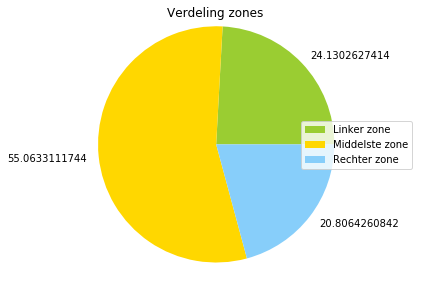

In [56]:
df_zone4_perc_labels = [r'Linker zone', r'Middelste zone', r'Rechter zone']
df_zone4_perc_sizes = df_zone4_percentage
df_zone4_perc_colors = ['yellowgreen', 'gold', 'lightskyblue']
df_zone4_perc_patches, texts = plt.pie(df_zone4_perc_sizes, colors=df_zone4_perc_colors, labels=df_zone4_percentage)
plt.legend(df_zone4_perc_patches, df_zone4_perc_labels, loc="right")

plt.axis('equal')
plt.tight_layout()
plt.suptitle('Verdeling zones')
plt.show()

#### Is er spraken van een normaalverdeling?

Een normaal verdeling heeft te maken met skewness & kurtosis van de data. Een manier om snel te kunnen zien of data normaal verdeeld is door een probability plot toe te passen.

##### zonesCount

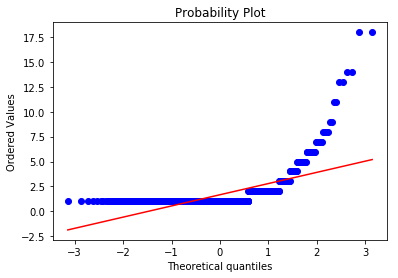

In [57]:
fig = plt.figure()
x = df_zones['zonesCount'].values
stats.probplot(x, plot=plt)
plt.show()

De bovenstaande plot heeft een rodelijn die de normaal verdeling voorsteld. De blauwe elementen zijn de waarden van de 'zonesCount' van de dataset. Deze werkt sterk af en is dus niet normaal verdeeld.

##### lPercentage

Hieronder zien we een visualisatie van de probability van de LPercentage (Hoeveel procent in acties voorkomen aan de linker kant van het veld)

Op de y as bij 0 en 100 zijn er veel waarden af te lezen. Zoals de data er nu uitziet is deze dus niet normaal verdeeld.

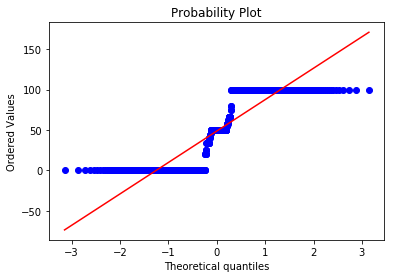

In [58]:
fig = plt.figure()
x = df_zones['mPercentage'].values
stats.probplot(x, plot=plt)

plt.show()

Als we nou die 0 en 100 waarden uitfilteren en concentreren op de waarden in het midden krijgen we een heel ander beeld. Dit lijkt eerder wel weer normaalverdeeld te zijn. 

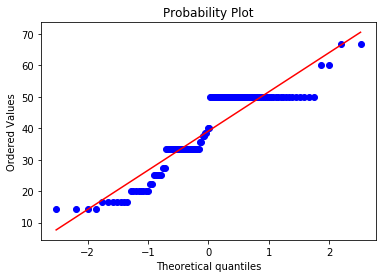

In [59]:
fig = plt.figure()
x = df_zones[(df_zones['lPercentage'] != 100) & (df_zones['lPercentage'] > 0)]['lPercentage'].values
stats.probplot(x, plot=plt)

plt.show()

Soortgelijke resultaten zullen plaatsvinden bij de mPercentage en de rPercentage.

#### Correlatie:

Zijn er dan nog verbanden te leggen tussen de columns in de dataset?

In [60]:
df_zones.corr()

,id,zonesCount,lPercentage,mPercentage,rPercentage
id,1.000000,-0.067749,-0.032414,0.099755,-0.079361
zonesCount,-0.067749,1.000000,-0.012600,0.006305,0.005813
lPercentage,-0.032414,-0.012600,1.000000,-0.573041,-0.379306
mPercentage,0.099755,0.006305,-0.573041,1.000000,-0.540926
rPercentage,-0.079361,0.005813,-0.379306,-0.540926,1.000000


Hierboven zijn enkele negatieve correlaties te zien en vrijwel geen positieve. Mogelijk verschilt dit weer per wedstrijd als er dan oppeens meer aan een andere kant wordt gespeeld.

#### Totale rendement per speler per wedstrijd:

In [61]:
from bokeh.charts import Bar, show, output_notebook, Donut
from bokeh.layouts import column
from bokeh.palettes import Spectral10

listy = []
for i in Rendamento:
    bor = Bar(i["plays"], values='count', label='rendement', palette=Spectral10, title=i['match'])
    listy.append(bor)
output_notebook()
show(column(listy))

Loading BokehJS ...

#### gemiddelt aantal keer gespeelt per speler per zone per wedstrijd:

In [62]:
listo = []
for i in zoneplayspMatch:
    a = i['plays']
    d = Bar(a, label='zone', values='count', group='group', agg='mean', title=i['match'])
    listo.append(d)
show(column(listo))